# **PURWADHIKA CAPSTONE 3 & 4**

# TELCO CUSTOMER CHURN PREDICTION

## **Business Problem**

**1. Business Domain Understanding** 

Customer Churn is defined as the event when customers decide to stop subscribing to a service provided by a company. The telecommunications industry, in particular, suffers from a high degree of customer churn. This is due to a myriad of different factors. Some of the reasons that cause customers to churn in the industry are poor service quality, competitors offering customers with better deals, and the low barrier to switching to other providers. 
Customer churn is a very important indicator of the liquidity of a telecom company, as its short-term profit is measured by the revenue gained from the periodic cash flows obtained from subscription contracts. The cutoff of these regular subscriptions would mean losing the company's primary means of financing its operations and repaying its short-term debt. Therefore, it can be concluded that minimizing the loss of regular customer subscriptions (minimizing churn) is of the utmost importance for a telecommunications company.

**2. Business Problem Formulation**

The given dataset shows that a significant amount of customers ended up churning from a telecom company. By implementing a machine learning classification model to predict whether its customers will churn or not, the company could reduce the rate of churn of its customers and reduce their losses resulting from churn. The company could also set up preventive measures to stop customers from churning, such as delivering targeted retention programs or offering personalized discounts or offers based on a given customer's characteristics. In addition to that, the company would have the benefit of automating its churn identification process, instead of identifying which customers will churn manually. This results in the improvement of the time and cost efficiency of customer retention decision-making.

**3. Analytical Context**

The telecom company wants to prevent customers from churning. 
Customers who are predicted to churn will be offered special discounts or offers for cheaper or better quality services in order to prevent them from churning. 
The historical data was collected from about 5000 of the company's customers about the types of subcriptions the customers were subscribed to, data about their subscription transactions, and whether the customer churned their subscriptions by the end of the observation period.
The company is interested to know which customers will stop their subscriptions based on the features provided in this dataset. By classifying customers into those who will churn and those who won't, we could target customer retention programs to customers who are predicted to churn, and continue serving customers who aren't predicted to churn as usual. By doing this, we can prevent customers from churning without incurring too much unnecessary retention costs.

The dataset contains observations for around 5000 of the company's customers. This project aims to build an ML model that can predict if the customer will churn from the company or not based on certain features provided in the dataset.
This project aims to simulate the role of a data scientist in the telecommunications company.

**4. Evaluation Metric**

This project aims to identify as many churning customers as possible (higher recall), at the cost of having a bias towards falsely identifying non-churning customers as churning (lower precision). As the cost of misclassifying non-churning customers as churning is non-zero and the cost of misclassifying churning customers as not churning is higher, the evaluation metric should be f2, the weighted average of recall and precision with recall having the larger weight. This is done with assumption that the cost incurred for implementing customer retention strategies is lower than the cost incurred by customer churn. This is assumed from the premise that the profits gained from a customer subscription should ideally exceed the retention cost of targeting the particular customer, in order for the retention efforts to be worth while.
Therefore, we will focus more on the model's recall score because we are more intersted in minimizing false negatives than we are in minimizing false positives for the positive class.

- **False Negative (FN):** if a customer is predicted not to churn, but he/she actually did. 
- **False Positive (FP):** if a customer is predicted to churn, but he/she actually did not. 

- **Cost of FN:** we lost a customer to churn.
- **Cost of FP:** We incurred unnecessary cost from targeting a non-churning customer.

## **Data Understanding**

Features

- **Dependents**: Whether the customer has dependents or not.
- **Tenure**: Number of months the customer has stayed with the company.
- **OnlineSecurity**: Whether the customer has online security or not.
- **OnlineBackup**: Whether the customer has online backup or not.
- **InternetService**: Whether the client is subscribed to Internet service.
- **DeviceProtection**: Whether the client has device protection or not.
- **TechSupport**: Whether the client has tech support or not 
- **Contract**: Type of contract according to duration.
- **PaperlessBilling**: Bills issued in paperless form.
- **MonthlyCharges**: Amount of charge for service on monthly bases.

Target 

- **Churn**: Whether the customer left the company or not.

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import pickle

c:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Data Cleaning

In [2]:
telco = pd.read_csv('data_telco_customer_churn.csv')
telco.rename(columns = {'tenure':'Tenure'}, inplace = True)
telco['Churn'].replace(['No', 'Yes'], [0, 1], inplace=True)
telco

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,0
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,0
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,0
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,1


We imported our dataset, renamed the tenure column, and changed the labels for customers who churned as 1 and 0 for those who didn't churn.

In [3]:
telco.columns

Index(['Dependents', 'Tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   Tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 423.8+ KB


### Dropping Duplicate Entries

In [5]:
telco.duplicated().sum()

77

Duplicate columns will be removed, as they provide redundant information to the model. When a column is duplicated, it essentially provides the same feature twice, which can lead to overfitting.

In [6]:
telco.drop_duplicates(inplace=True)
telco.shape

(4853, 11)

### Checking for Null Values

In [7]:
telco.isna().sum()

Dependents          0
Tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

As we can see from the output above, the dataset does not contain any null values

### Defining Numerical and Categorical Features

In [8]:
numerical_features = [cols for cols in telco if telco[cols].dtypes in ['int64', 'float64'] and cols not in ['Churn']]
categorical_features = [cols for cols in telco if telco[cols].dtypes == 'object']
print(numerical_features, categorical_features)

['Tenure', 'MonthlyCharges'] ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


### Checking Categorical Data Proportions and Unique Values

In [9]:
for col in categorical_features:
    print(telco[col].value_counts(normalize=True))

Dependents
No     0.696476
Yes    0.303524
Name: proportion, dtype: float64
OnlineSecurity
No                     0.498661
Yes                    0.294663
No internet service    0.206676
Name: proportion, dtype: float64
OnlineBackup
No                     0.442613
Yes                    0.350711
No internet service    0.206676
Name: proportion, dtype: float64
InternetService
Fiber optic    0.443849
DSL            0.349475
No             0.206676
Name: proportion, dtype: float64
DeviceProtection
No                     0.445498
Yes                    0.347826
No internet service    0.206676
Name: proportion, dtype: float64
TechSupport
No                     0.503194
Yes                    0.290130
No internet service    0.206676
Name: proportion, dtype: float64
Contract
Month-to-month    0.549145
Two year          0.235524
One year          0.215331
Name: proportion, dtype: float64
PaperlessBilling
Yes    0.60272
No     0.39728
Name: proportion, dtype: float64


It can be seen from the output above that there are no features with significant class imbalances

### Numerical Column Description

In [10]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,4853.0,32.679992,24.395554,0.0,9.00,29.0,56.00,72.00
MonthlyCharges,4853.0,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65
Churn,4853.0,0.265403,0.441593,0.0,0.00,0.0,1.00,1.00


### Outlier Detection

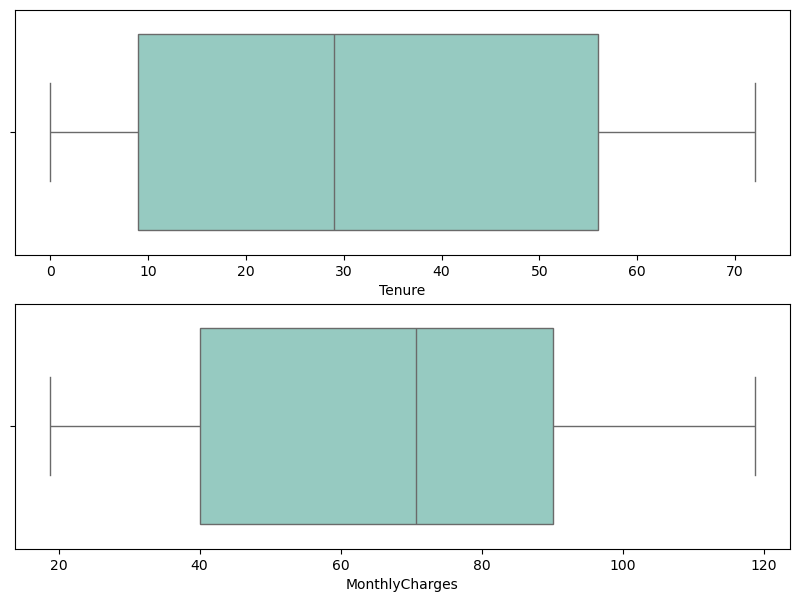

In [11]:
figure, axes = plt.subplots(2,1, figsize = (10,7))
for i, col in enumerate(numerical_features):
    sns.boxplot(telco[col], ax =axes[i], orient='h', palette = 'Set3')

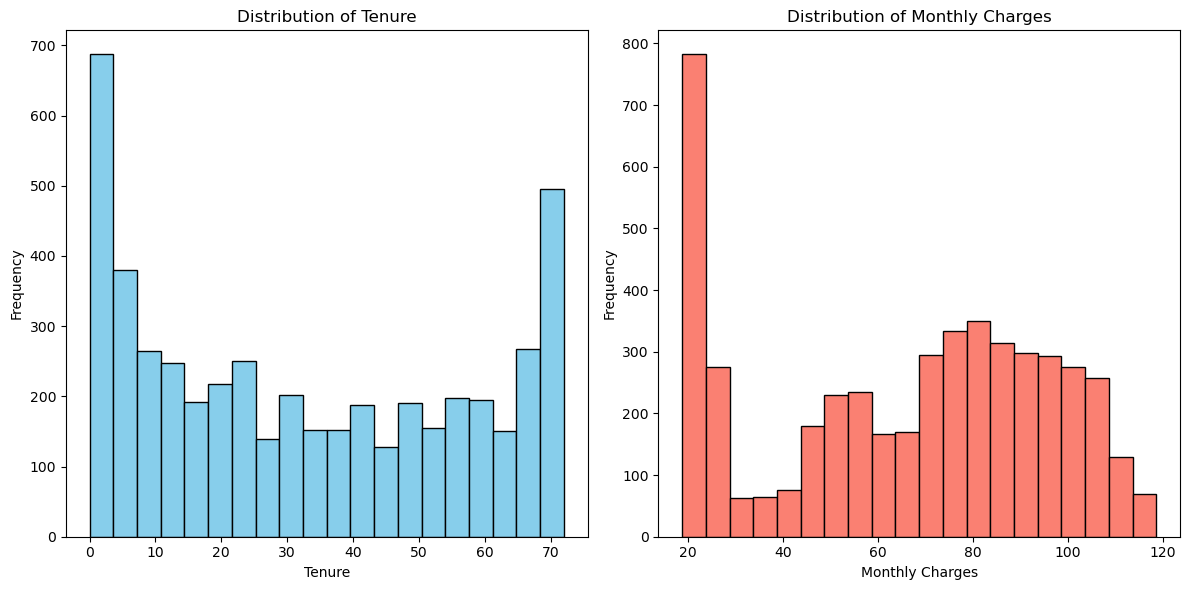

In [12]:
# Plotting histograms using matplotlib
plt.figure(figsize=(12, 6))

# Histogram for Tenure
plt.subplot(1, 2, 1)
plt.hist(telco['Tenure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

# Histogram for MonthlyCharges
plt.subplot(1, 2, 2)
plt.hist(telco['MonthlyCharges'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

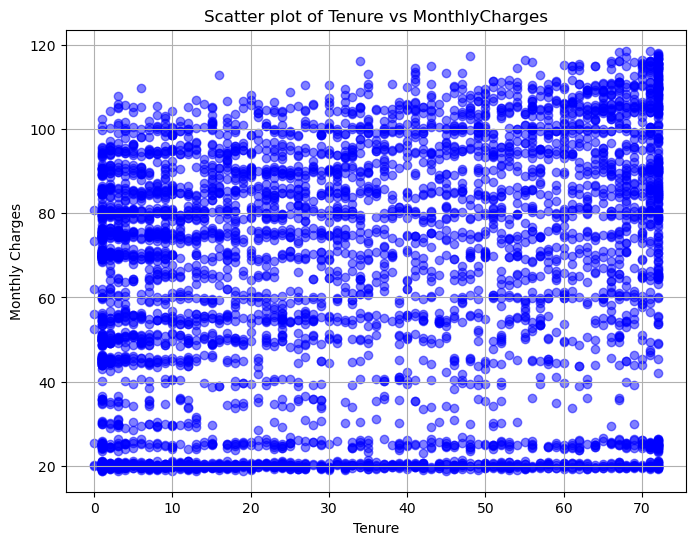

In [16]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(telco['Tenure'], telco['MonthlyCharges'], color='b', alpha=0.5)
plt.title('Scatter plot of Tenure vs MonthlyCharges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

No global, contextual, nor collective outliers are present in this dataset based on the boxplots, histograms, and scatterplot of the two numerical features. Although some values group towards the lower or higher end of the histograms of the two features, they are still close enough to their IQR's to not be considered group outliers as is shown in the boxplots. Since we see visible skews in the two features, will use the standard scaler later on.

### Numerical Feature Mean Comparison

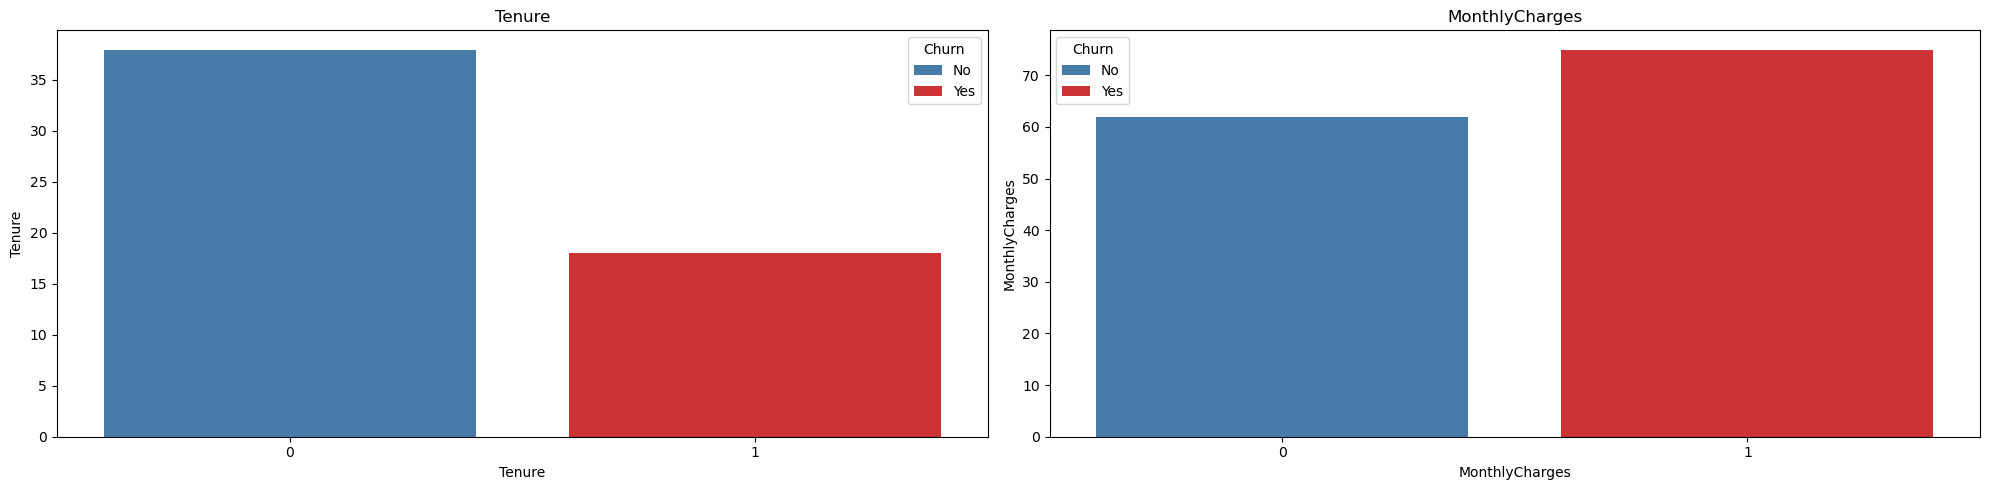

In [13]:
plt.figure(figsize = (20,5))
sns.set_palette('Set1')
current_palette = sns.color_palette()
reversed_palette = current_palette[1::-1]
sns.set_palette(reversed_palette)
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(1,2,plotnumber)
    sns.barplot(data = telco, x = 'Churn', y =feature, hue = 'Churn', errorbar=None)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
    plt.tight_layout()
    plt.legend(title = 'Churn', labels=['No', 'Yes'])

Tenure
* Customers who churned have stayed with the company for a shorter period (roughly 18 months on average) compared to customers who didn't churn (roughly 38 months on average)

Monthly Charges
* Customers who churned were charged with higher service fees on a monthly basis (roughly $74.95 on average) compared to customers who didn't churn (roughly $61.84 on average)

In [14]:
mean_mtx = telco.groupby('Churn')[numerical_features].mean()
mean_mtx

,Tenure,MonthlyCharges
Churn,,
0,37.971669,61.843871
1,18.033385,74.947244


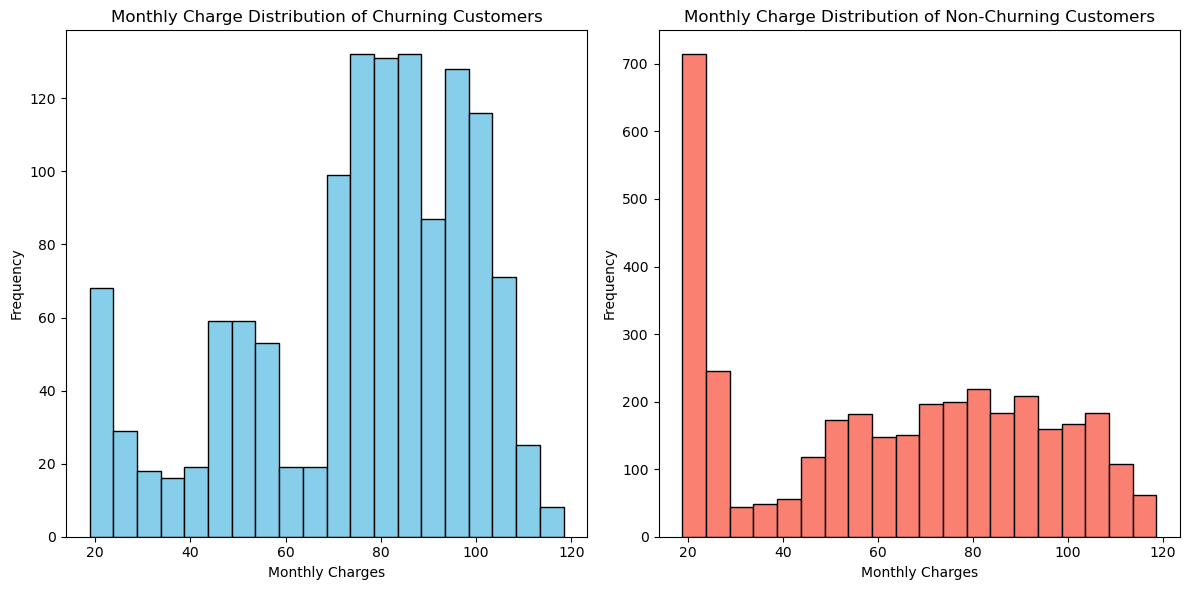

In [15]:
# Plotting histograms using matplotlib
plt.figure(figsize=(12, 6))

# Histogram for Tenure
plt.subplot(1, 2, 1)
plt.hist(telco[telco['Churn'] == 1]['MonthlyCharges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Monthly Charge Distribution of Churning Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

# Histogram for MonthlyCharges
plt.subplot(1, 2, 2)
plt.hist(telco[telco['Churn'] == 0]['MonthlyCharges'], bins=20, color='salmon', edgecolor='black')
plt.title('Monthly Charge Distribution of Non-Churning Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [123]:
mean_mtx['MonthlyCharges'][1]-mean_mtx['MonthlyCharges'][0]

13.10337282107794

The average monthly charge for customers who stayed with the company is indeed lower by $13.10 on average than for those who churned. We could take this difference as the average price reduction for discounts or alternative services that we will offer to customers who are predicted to churn. This also gives us an estimation of the cost of a single false positive for our model.

In [117]:
len(telco[telco['Churn'] == 1])/len(telco)

0.26540284360189575

The company had a churn rate of 26.54%

In [124]:
telco.loc[telco['Churn'] == 1, 'MonthlyCharges'].sum()

96532.04999999999

We lost almost $100,000 in total due to churn

In [125]:
telco['MonthlyCharges'].sum()

317005.45

Our potential total revenue is about $320,000

In [126]:
telco.loc[telco['Churn'] == 1, 'MonthlyCharges'].sum()/telco['MonthlyCharges'].sum()

0.3045122725808026

We lost around 30.45% of total revenue to customer churn

### Categorical Column Description

In [127]:
telco.describe(include = 'object').T

,count,unique,top,freq
Dependents,4853,2,No,3380
OnlineSecurity,4853,3,No,2420
OnlineBackup,4853,3,No,2148
InternetService,4853,3,Fiber optic,2154
DeviceProtection,4853,3,No,2162
TechSupport,4853,3,No,2442
Contract,4853,3,Month-to-month,2665
PaperlessBilling,4853,2,Yes,2925


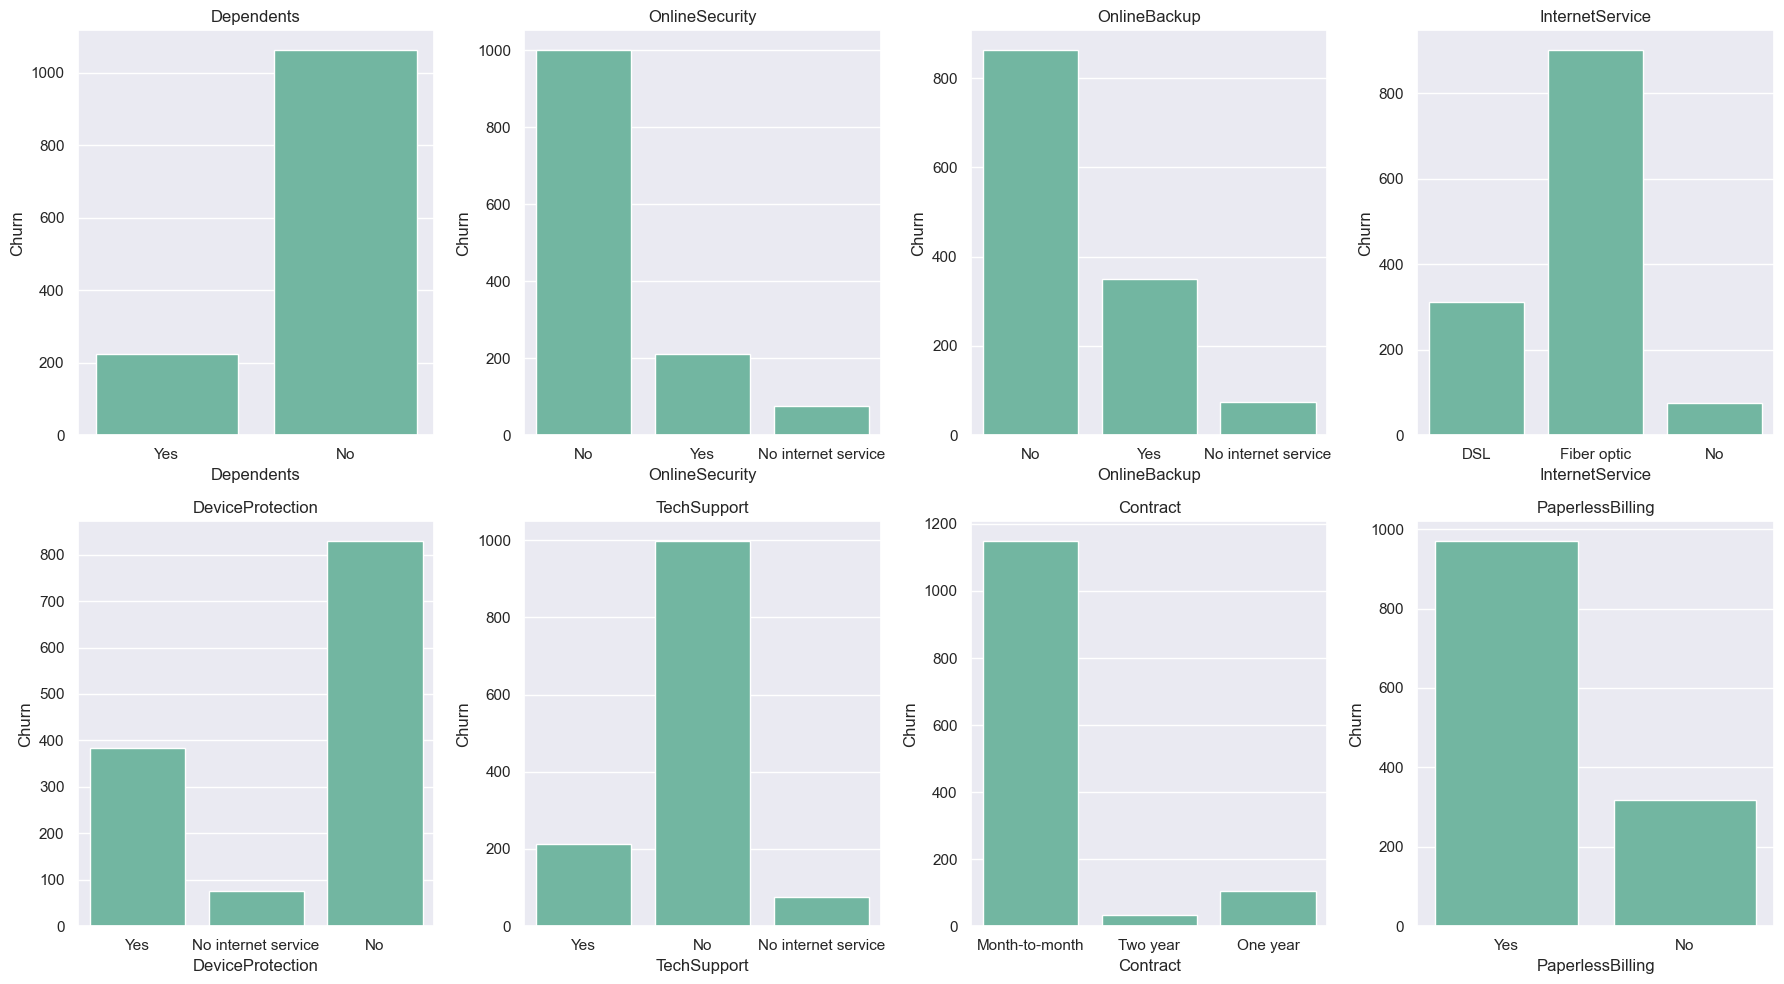

In [128]:
plt.figure(figsize = (18,10))
sns.set(palette = 'Set2')
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(2,4,plotnumber)
    sns.barplot(data = telco, x = feature, y ='Churn', estimator = np.sum, errorbar=None)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
    plt.tight_layout()

Customers that churn are more likely to have the following characteristics:

* Does not have any dependents
* Does not have an online security subscription
* Does not have an online backup subscription
* Has a fiber optic internet service subscription
* Does not have a device protection subscription
* Does not have a tech support subscription
* Has a month-to-month subscription contract
* Has their bills issued in paperless form

In [129]:
churn = telco[(telco['Dependents'] == 'No') & (telco['OnlineSecurity'] == 'No') & (telco['OnlineBackup'] == 'No') & (telco['InternetService'] == 'Fiber optic') & (telco['DeviceProtection'] == 'No') & (telco['TechSupport'] == 'No') & (telco['Contract'] == 'Month-to-month') & (telco['PaperlessBilling'] == 'Yes') & (telco['Churn'] == 1)]
eda_churn = churn['Churn'].count()
eda_churn

263

In [130]:
total_churn = telco[(telco['Churn'] == 1)]['Churn'].count()
total_churn

1288

In [131]:
eda_churn/total_churn

0.20419254658385094

Around 20.42% of customers who have churned had all of the aforementioned characteristics

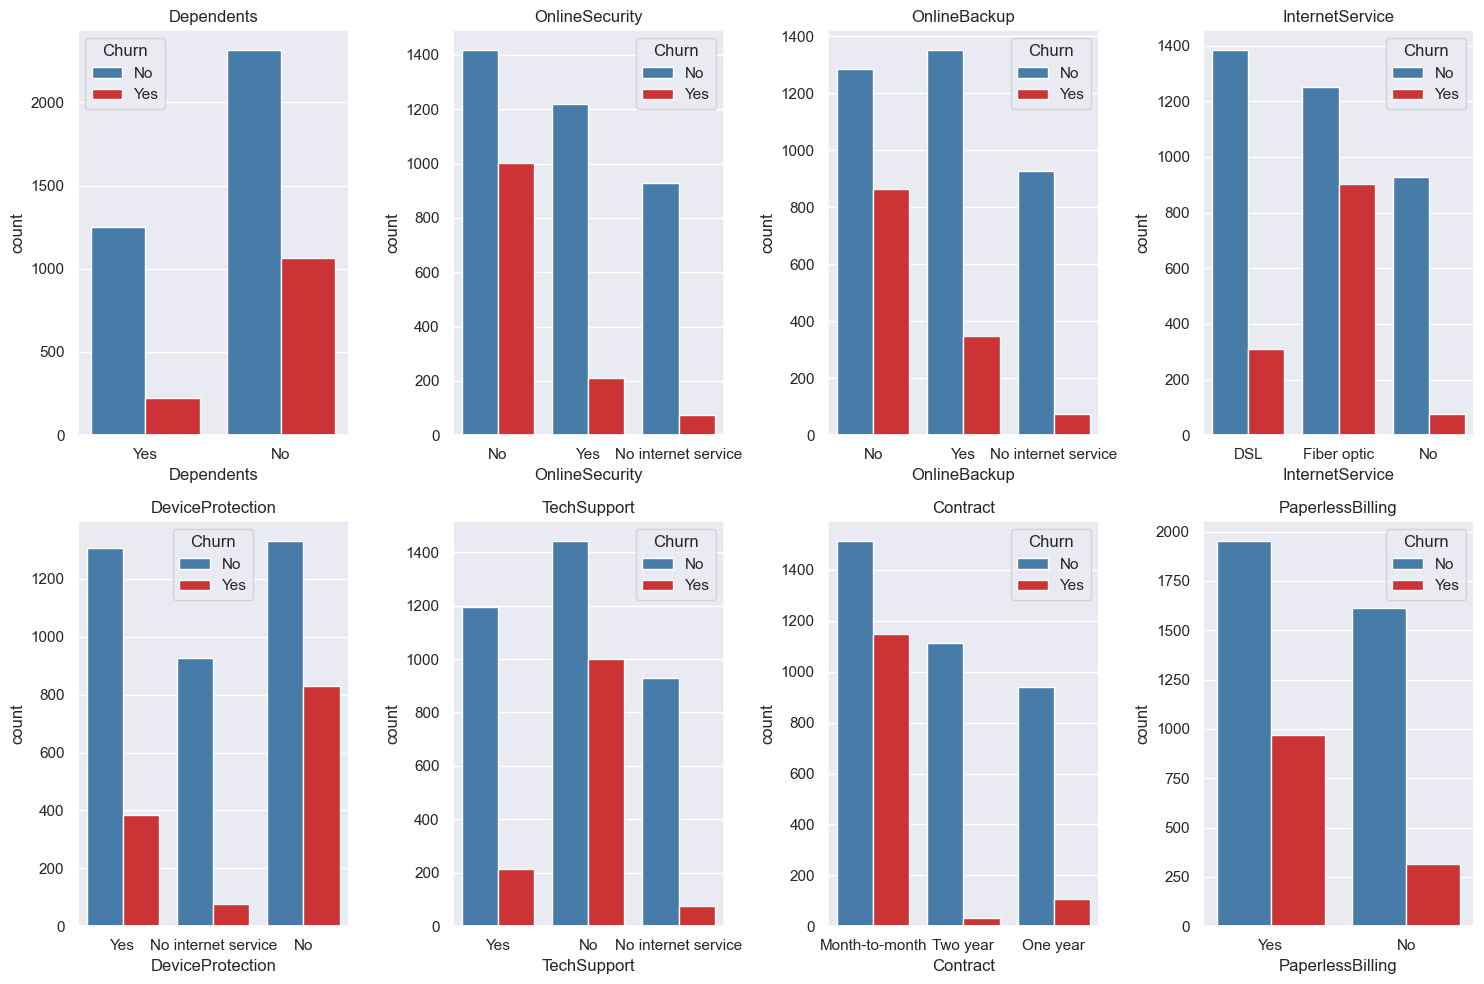

In [132]:
plt.figure(figsize = (15,10))
sns.set_palette(reversed_palette)
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(2,4,plotnumber)
    sns.countplot(data = telco, x = feature, hue = 'Churn')
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
    plt.tight_layout()
    plt.legend(title = 'Churn', labels=['No', 'Yes'])

The plots above show us that the company has certain services or operations that is correlated with significant amounts of customer churn, these include the fiber optic internet service, the month-to-month contract subscription, and paperless billing, where each feature contributed to more than or close to 1000 customer churns. These represent the areas for future service improvement.

## **Data Splitting**

#### Split the data into the features and target

In [133]:
X = telco.drop(columns=['Churn'])
y = telco['Churn']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

In [135]:

single_predictions = X_test.iloc[10].values, X_test.iloc[1].values
single_predictions

(array(['Yes', 61, 'No internet service', 'No internet service', 'No',
        'No internet service', 'No internet service', 'Two year', 'Yes',
        25.0], dtype=object),
 array(['No', 18, 'No', 'No', 'Fiber optic', 'No', 'No', 'Month-to-month',
        'No', 78.55], dtype=object))

The arrays in single_predictions will be copied into the cloud editor deployment script to demonstrate single observation predictions on the Google Cloud Platform

In [136]:
y_test.iloc[10], y_test.iloc[1]

(0, 1)

In [137]:
X_test

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
4323,No,15,No,Yes,Fiber optic,No,No,Month-to-month,Yes,83.20
159,No,18,No,No,Fiber optic,No,No,Month-to-month,No,78.55
281,No,72,No,No,Fiber optic,Yes,No,Two year,Yes,97.85
225,Yes,18,No,No,DSL,No,No,Month-to-month,Yes,45.65
1351,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,Yes,112.60
...,...,...,...,...,...,...,...,...,...,...
2076,No,24,No internet service,No internet service,No,No internet service,No internet service,One year,No,24.60
3737,No,51,No,No,Fiber optic,Yes,No,One year,Yes,98.85
4159,No,54,Yes,No,DSL,No,Yes,Two year,No,45.20
1408,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.85


In [138]:
X_test.to_csv('telco_churn_real.csv', index=False)

The X_test dataframe will be saved to a csv file that will be used to demonstrate bulk prediction on the Google Cloud Platform

## **Data Preprocessing**

#### Defining the transformer and the scaler

In [139]:
# transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), categorical_features)
], remainder = 'passthrough')

transformer.fit(telco)

# scaler
scaler = StandardScaler()


## **Feature Selection**

In [140]:
# Select K Best with chi-squared and 6 features was found to optimize the performance of the benchmark models during hyperparameter tuning and we will conduct no feature engineering

kbest = SelectKBest(score_func=chi2, k=6)

## **Model Benchmarking**

In [141]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state = 0, verbosity = 0)

In [142]:
# check for the best benchmark model
models = [logreg,knn,tree,rf,ada,gbc,xgbc]
model_name = []
score = []
train_score = []
std_value = []

for i in models:
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring=make_scorer(fbeta_score, beta = 2),
        error_score='raise'
    )

    score.append(model_cv)
    train_score.append(model_cv.mean())
    std_value.append(model_cv.std())
    model_name.append(i.__class__.__name__)

benchmark_model_train = pd.DataFrame({
    'model': model_name,
    'train_score':train_score,
    'std':std_value
}).sort_values(by = 'train_score', ascending=False, ignore_index=True)

benchmark_model_train

,model,train_score,std
0,GradientBoostingClassifier,0.539464,0.024943
1,LogisticRegression,0.538217,0.027503
2,XGBClassifier,0.521269,0.020154
3,AdaBoostClassifier,0.509825,0.007704
4,RandomForestClassifier,0.494431,0.008800
5,KNeighborsClassifier,0.490966,0.008862
6,DecisionTreeClassifier,0.482016,0.014124


In [143]:
# check for the best benchmark model on the test set
test_score = []
model_name = []

for i in models:
    model_pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model', i)
    ])

    # fitting
    model_pipeline.fit(X_train, y_train)

    # predict
    y_pred_test = model_pipeline.predict(X_test)

    # evaluate
    f2 = fbeta_score(y_test, y_pred_test, beta=2)
    test_score.append(f2)
    model_name.append(i.__class__.__name__)

benchmark_model_test = pd.DataFrame({
    'model': model_name,
    'test_score':test_score
    }).sort_values(by = 'test_score', ascending=False, ignore_index=True)

benchmark_model_test

,model,test_score
0,LogisticRegression,0.556452
1,GradientBoostingClassifier,0.499590
2,XGBClassifier,0.483871
3,AdaBoostClassifier,0.473026
4,KNeighborsClassifier,0.460848
5,DecisionTreeClassifier,0.448168
6,RandomForestClassifier,0.445990


In [144]:
# combine and compare
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('model'))
benchmark_model.drop(columns = 'std', inplace=True)
benchmark_model['diff'] = benchmark_model['test_score'] - benchmark_model['train_score']
benchmark_model.sort_values(by='test_score', ascending=False)

,test_score,train_score,diff
model,,,
LogisticRegression,0.556452,0.538217,0.018235
GradientBoostingClassifier,0.499590,0.539464,-0.039874
XGBClassifier,0.483871,0.521269,-0.037398
AdaBoostClassifier,0.473026,0.509825,-0.036800
KNeighborsClassifier,0.460848,0.490966,-0.030117
DecisionTreeClassifier,0.448168,0.482016,-0.033847
RandomForestClassifier,0.445990,0.494431,-0.048441


First Best Benchmark Model based on Test Score: Logistic Regression

Second Best Benchmark Model based on Test Score: Gradient Boosting

## **Hyperparameter Tuning**

### Logistic Regression

In [145]:
# Regularization Strength
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Penalty type (L1 or L2 regularization)
penalty = ['l1', 'l2']

# Solver for optimization (depends on the size of the dataset)
solver = ['liblinear', 'saga']

# Maximum number of iterations for the solver to converge
max_iter = [100, 200, 300, 400, 500]

# Hyperparameter GBC
hyperparameter_space_LogReg = {
    'model__penalty': ['l1', 'l2'],                     # Regularization penalty: l1 (Lasso) or l2 (Ridge)
    'model__C': [0.001, 0.01, 0.1, 1.0, 10.0],           # Inverse of regularization strength (smaller values specify stronger regularization)
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Optimization algorithm
    'model__max_iter': [50, 100, 200, 300, 400],         # Maximum number of iterations for the solvers to converge
    'model__multi_class': ['auto', 'ovr', 'multinomial'],  # Strategy for multiclass problems: 'auto', 'ovr' (one-vs-rest), 'multinomial' (softmax)
    'model__tol': [1e-4, 1e-3, 1e-2],                   # Tolerance for stopping criteria
    'model__class_weight': [None, 'balanced']          # Weights associated with classes for handling class imbalance
}

In [146]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits = 5)

# Benchmark Model 1
logreg = LogisticRegression(random_state = 0)

# Create algorithm chain
estimator_logreg = Pipeline([
    ('transformer', transformer),
    ('feature_selection', kbest),
    ('scaler', scaler),
    ('model', logreg)
])

# hyperparameter tuning
grid_logreg = GridSearchCV(
    estimator = estimator_logreg,
    param_grid = hyperparameter_space_LogReg,
    cv = skf,
    scoring = make_scorer(fbeta_score, beta = 2),
    n_jobs = -1
)

In [147]:
grid_logreg.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling'])])),
                                       ('feature_selection...
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [50, 100, 200, 300, 400],
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'model__tol': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(fbeta_score, beta=2))

In [148]:
print('Logistic Regression')
print('Best_Score : ', grid_logreg.best_score_)
print('Best_Params : ', grid_logreg.best_params_)

Logistic Regression
Best_Score :  0.7228563838035375
Best_Params :  {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__max_iter': 50, 'model__multi_class': 'auto', 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.0001}


### Gradient Boosting

In [149]:
# Original hyperparameter grid for Gradient Boosting

hyperparameter_space_GBC = {
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5],
    'model__max_features': ['log2', 'sqrt', None],
    'model__subsample': [0.5, 0.8, 1.0]
}

In [150]:
#### The following model was found as a result of tuning the hyperparameters of the Gradient Boosting model using grid search:

tuning_gbc = GradientBoostingClassifier(
    learning_rate = 0.1,
    max_depth = 3,
    max_features = None,
    min_samples_leaf = 2,
    min_samples_split = 10,
    n_estimators = 100,
    subsample = 1.0
)

In [151]:
# Simplified hyperparameter grid for Gradient Boosting

hyperparameter_space_GBC = {
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100, 300],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 5],
    'model__max_features': ['log2', None],
    'model__subsample': [0.5, 1.0]
}

In [152]:
# Benchmark Model 2
gbc = GradientBoostingClassifier(random_state = 0)

# Create algorithm chain
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('feature_selection', kbest),
    ('model', gbc)
])

# hyperparameter tuning
grid_GBC = GridSearchCV(
    estimator = estimator_gbc,
    param_grid = hyperparameter_space_GBC,
    cv = skf,
    scoring = make_scorer(fbeta_score, beta = 2),
    n_jobs = -1
)

In [153]:
grid_GBC.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling'])])),
                                       ('feature_selection...
                                                    score_func=<function chi2 at 0x000001AAA3DC4C10>)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5],
                         'model__max_features': ['log2', None],
                         'model__min_samples_leaf': [2, 5],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [100, 300],
                         'model__subsample': [0.5, 1.0]},
             scoring=make_scorer(fbeta_score, beta=2))

In [154]:
print('Gradient Boost')
print('Best_Score : ', grid_GBC.best_score_)
print('Best_Params : ', grid_GBC.best_params_)

Gradient Boost
Best_Score :  0.53524599157348
Best_Params :  {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 100, 'model__subsample': 1.0}


The performance of the gradient boosting model wasn't improved significantly after tuning. We could instead use a better optimized version of Gradient Boosting in order to boost testing performance. We could choose either AdaBoost or XGBoost. XGBoost will be used as the third benchmark model because it is more robust in handling complex datasets.

### Extreme Gradient Boosting

In [155]:
# Original hyperparameter grid for Extreme Gradient Boosting
hyperparameter_space_XGB = {
    'model__n_estimators': [100, 200, 300],  # Number of boosting rounds
    'model__max_depth': [3, 5, 8, 10],      # Maximum tree depth
    'model__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'model__gamma': [0.3, 0.4, 0.5, 1],            # Minimum loss reduction required to make a further partition on a leaf node
    'model__reg_alpha': [0, 0.5, 1, 10, 20],           # L1 regularization term on weights
    'model__reg_lambda': [0, 0.5, 1, 10, 20],          # L2 regularization term on weights
    'model__scale_pos_weight': [1,3,5,10]           
}

In [156]:
# The following model was found as a result of tuning the hyperparameters of the XGBoost model using grid search:

tuning_xgb = XGBClassifier(
    gamma = 0.4,
    learning_rate = 0.1,
    max_depth = 3,
    n_estimators = 100,
    reg_alpha = 20,
    reg_lambda = 10,
    scale_pos_weight = 5
)

In [157]:
# Simplified hyperparameter grid for Extreme Gradient Boosting
hyperparameter_space_XGB = {
    'model__n_estimators': [100, 300],  # Number of boosting rounds
    'model__max_depth': [3, 5],      # Maximum tree depth
    'model__learning_rate': [0.05, 0.1],  # Learning rate
    'model__gamma': [0.3, 0.4],            # Minimum loss reduction required to make a further partition on a leaf node
    'model__reg_alpha': [10, 20],           # L1 regularization term on weights
    'model__reg_lambda': [1, 10],          # L2 regularization term on weights
    'model__scale_pos_weight': [5,10]           
}

In [158]:
# Benchmark Model 2
xgb = XGBClassifier(random_state = 0)

# Create algorithm chain
estimator_XGB = Pipeline([
    ('transformer', transformer),
    ('feature_selection', kbest),
    ('model', xgb)
])

# hyperparameter tuning
grid_XGB = GridSearchCV(
    estimator = estimator_XGB,
    param_grid = hyperparameter_space_XGB,
    cv = skf,
    scoring = make_scorer(fbeta_score,beta = 2),
    n_jobs = -1
)

In [159]:
grid_XGB.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling'])])),
                                       ('feature_selection...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             n_jobs=-1,
             param_grid={'model__gamma': [0.3, 0.4],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 300],
                         'model__reg_alpha': [10, 20],
                         'model__reg_lambda': [1, 10],
                         'model__scale_pos_weight': [5, 10]},
             scoring=make_scorer(fbeta_score, beta=2))

In [160]:
print('Extreme Gradient Boosting')
print('Best_Score : ', grid_XGB.best_score_)
print('Best_Params : ', grid_XGB.best_params_)

Extreme Gradient Boosting
Best_Score :  0.7502296722477982
Best_Params :  {'model__gamma': 0.4, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 20, 'model__reg_lambda': 10, 'model__scale_pos_weight': 5}


XGBoost had the best performance out of all the benchmark models

## **Model Test Performance**

### Before & After Hyperparameter Tuning : Extreme Gradient Boosting

In [161]:
benchmark_model

,test_score,train_score,diff
model,,,
LogisticRegression,0.556452,0.538217,0.018235
GradientBoostingClassifier,0.499590,0.539464,-0.039874
XGBClassifier,0.483871,0.521269,-0.037398
AdaBoostClassifier,0.473026,0.509825,-0.036800
KNeighborsClassifier,0.460848,0.490966,-0.030117
DecisionTreeClassifier,0.448168,0.482016,-0.033847
RandomForestClassifier,0.445990,0.494431,-0.048441


In [162]:
# benchmark model 1 before tuning
model = LogisticRegression(random_state=0)

model_pipe_logreg = Pipeline([
    ('transformer', transformer),
    ('feature_selection', kbest),
    ('scaler', scaler),
    ('model', model)
])

model_pipe_logreg.fit(X_train, y_train)

y_pred = model_pipe_logreg.predict(X_test)
print('Logistic Regression Before Tuning')
print('Recall_Score : ', recall_score(y_test, y_pred))
print('F2_Score     : ', fbeta_score(y_test, y_pred, beta = 2))

Logistic Regression Before Tuning
Recall_Score :  0.5387596899224806
F2_Score     :  0.5609362389023406


In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       713
           1       0.67      0.54      0.60       258

    accuracy                           0.81       971
   macro avg       0.76      0.72      0.74       971
weighted avg       0.80      0.81      0.80       971



In [164]:
# benchmark model 1 after tuning
logreg_tuning = grid_logreg.best_estimator_

y_pred_logreg_tuning = logreg_tuning.predict(X_test)
print('Logistic Regression After Tuning')
print('Recall_Score : ', recall_score(y_test, y_pred_logreg_tuning))
print('F2_Score     : ', fbeta_score(y_test, y_pred_logreg_tuning, beta = 2))

Logistic Regression After Tuning
Recall_Score :  0.8449612403100775
F2_Score     :  0.7425068119891008


In [165]:
print(classification_report(y_test,y_pred_logreg_tuning))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79       713
           1       0.50      0.84      0.63       258

    accuracy                           0.73       971
   macro avg       0.71      0.77      0.71       971
weighted avg       0.81      0.73      0.75       971



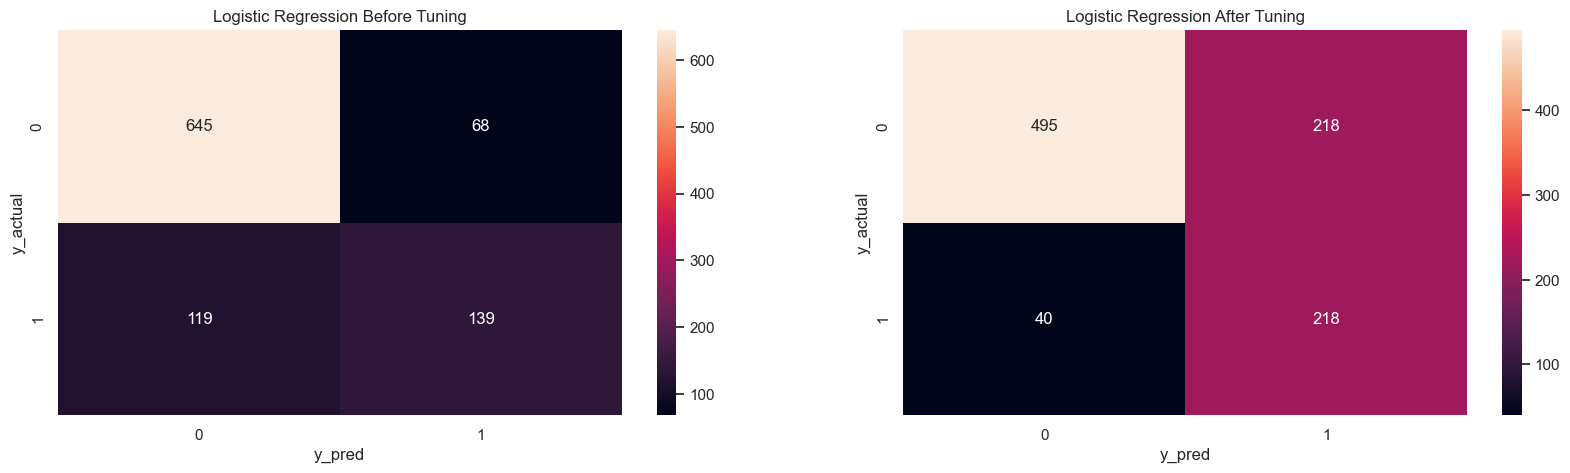

In [166]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Logistic Regression Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_tuning), annot = True, fmt = '.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Logistic Regression After Tuning')

plt.show()

**Best Model Score: Logistic Regression After Tuning**

* TP: 218 observations were predicted as churning customers, and were actually churning customers.
* TN: 495 observations were predicted as non-churning customers, and were actually non-churning customers.
* FP: 218 observations were predicted as churning customers, but were actually non-churning customers.
* FN: 40 observations were predicted as non-churning customers, but were actually churning customers.

### Before & After Hyperparameter Tuning : Gradient Boosting

In [167]:
# benchmark model 2 before tuning
model = GradientBoostingClassifier()

model_pipe_gbc = Pipeline([
    ('transformer', transformer),
    ('model', model)
])

model_pipe_gbc.fit(X_train, y_train)

y_pred = model_pipe_gbc.predict(X_test)
print('Gradient Boosting Before Tuning')
print('Recall_Score : ', recall_score(y_test, y_pred))
print('F2_Score     : ', fbeta_score(y_test, y_pred, beta = 2))

Gradient Boosting Before Tuning
Recall_Score :  0.4728682170542636
F2_Score     :  0.4995904995904996


In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       713
           1       0.65      0.47      0.55       258

    accuracy                           0.79       971
   macro avg       0.74      0.69      0.71       971
weighted avg       0.78      0.79      0.78       971



In [169]:
# benchmark model 2 after tuning
gbc_tuning = grid_GBC.best_estimator_

y_pred_gbc_tuning = gbc_tuning.predict(X_test)
print('Gradient Boosting After Tuning')
print('Recall_Score : ', recall_score(y_test, y_pred_gbc_tuning))
print('F2_Score     : ', fbeta_score(y_test, y_pred_gbc_tuning, beta = 2))

Gradient Boosting After Tuning
Recall_Score :  0.49224806201550386
F2_Score     :  0.5196399345335516


In [170]:
print(classification_report(y_test,y_pred_gbc_tuning))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       713
           1       0.67      0.49      0.57       258

    accuracy                           0.80       971
   macro avg       0.75      0.70      0.72       971
weighted avg       0.79      0.80      0.79       971



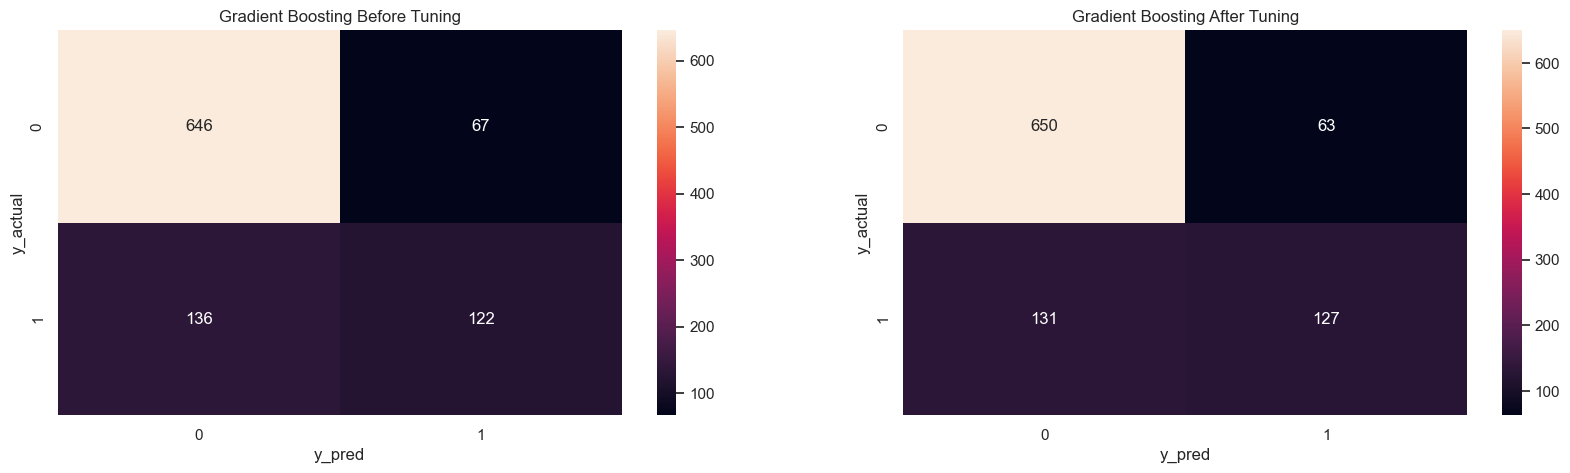

In [171]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Gradient Boosting Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot = True, fmt = '.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Gradient Boosting After Tuning')

plt.show()

**Best Model Score: Gradient Boosting After Tuning**

* TP: 127 observations were predicted as churning customers, and were actually churning customers.
* TN: 650 observations were predicted as non-churning customers, and were actually non-churning customers.
* FP: 63 observations were predicted as churning customers, but were actually non-churning customers.
* FN: 131 observations were predicted as non-churning customers, but were actually churning customers.

### Before & After Hyperparameter Tuning : Extreme Gradient Boosting

In [172]:
# benchmark model 3 before tuning
xgbc = XGBClassifier(random_state=0)

model_pipe_xgbc = Pipeline([
    ('transformer', transformer),
    ('feature_selection', kbest),
    ('model', xgbc)
])

model_pipe_xgbc.fit(X_train, y_train)

y_pred = model_pipe_xgbc.predict(X_test)
print('Extreme Gradient Boosting Before Tuning')
print('Recall_Score : ', recall_score(y_test, y_pred))
print('F2_Score     : ', fbeta_score(y_test, y_pred, beta = 2))

Extreme Gradient Boosting Before Tuning
Recall_Score :  0.4728682170542636
F2_Score     :  0.49312853678253843


In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       713
           1       0.60      0.47      0.53       258

    accuracy                           0.77       971
   macro avg       0.71      0.68      0.69       971
weighted avg       0.76      0.77      0.77       971



In [174]:
# benchmark model 3 after tuning
xgb_tuning = grid_XGB.best_estimator_

y_pred_xgb_tuning = xgb_tuning.predict(X_test)
print('Extreme Gradient Boosting After Tuning')
print('Recall_Score : ', recall_score(y_test, y_pred_xgb_tuning))
print('F2_Score     : ', fbeta_score(y_test, y_pred_xgb_tuning, beta = 2))

Extreme Gradient Boosting After Tuning
Recall_Score :  0.9069767441860465
F2_Score     :  0.76171875


In [175]:
print(classification_report(y_test,y_pred_xgb_tuning))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       713
           1       0.46      0.91      0.61       258

    accuracy                           0.70       971
   macro avg       0.71      0.76      0.68       971
weighted avg       0.82      0.70      0.71       971



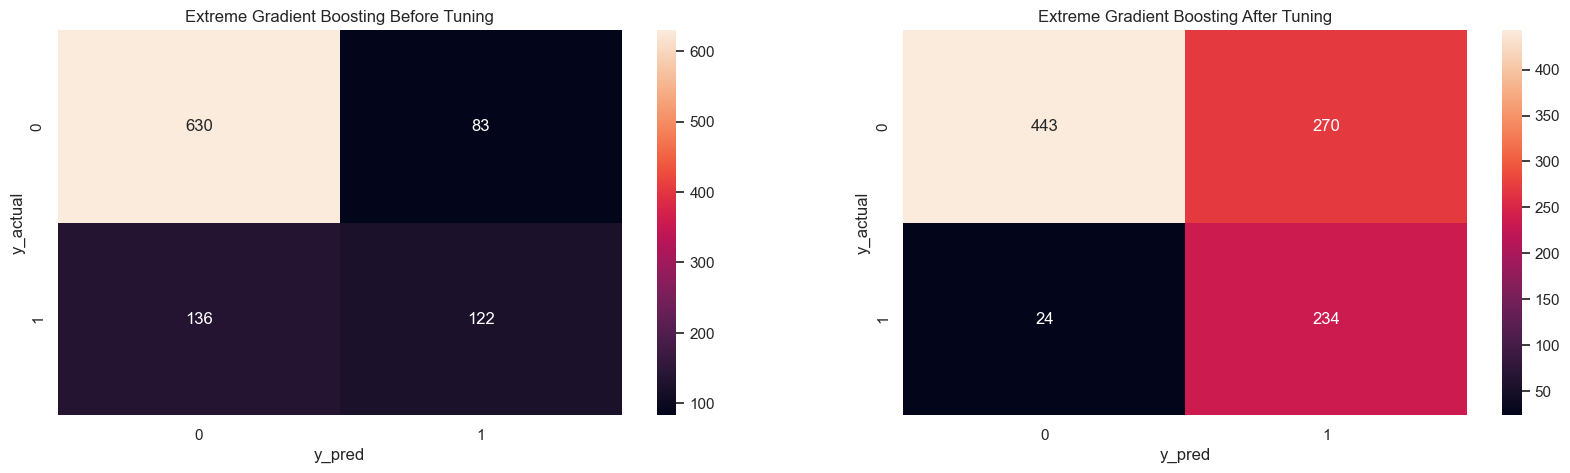

In [176]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Extreme Gradient Boosting Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuning), annot = True, fmt = '.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Extreme Gradient Boosting After Tuning')

plt.show()

**Best Model Score: Extreme Gradient Boosting After Tuning**

* TP: 234 observations were predicted as churning customers, and were actually churning customers.
* TN: 443 observations were predicted as non-churning customers, and were actually non-churning customers.
* FP: 270 observations were predicted as churning customers, but were actually non-churning customers.
* FN: 24 observations were predicted as non-churning customers, but were actually churning customers.

##  **Conclusion & Recommendation**

### EDA Recap
* The average difference between the monthly charges of churning customers vs non-churning customers is $13.10. We could take this difference as the average price reduction for discounts or alternative services that we will offer to customers who are predicted to churn. This also gives us an estimation of the cost of a single false positive for our model.
* The company lost $96,532 in total to churn
* The company had a churn rate of 26.54%

The tuned XGBoost model had a recall score of around 91%. This means the model was able to predict 91% of all churn cases. The total loss from churn was $96,532, which means we could save up to $87,844 from customer churn and mitigate our loss from churn to only $8,688. The downside of this is the model would misclassify 38% (1 - negative class recall) of customers who didn't churn as churning. However, this is still a preferable case, as the cost of customer retention (serving discounted prices or offering cheaper alternative services) are negligible compared to the loss of revenue as a result of churn.

We could estimate the expected loss from churn misclassification, which is the number of False Positives (270) times the total cost of offering discounts or cheaper services to customers who didn't need them, which is $13.10 as was determined during EDA. So the total expected loss from False Positives (type 1 error) would have been $3,497.7 or about $3,500.0. Add this amount to our initial False Negative cost (type 2 error) of $8,688 and we have a total loss of $12,185 from FP and FN. This leaves us with net revenue saved = total potential revenue - revenue lost from churn - cost of unnecessary retention ($96,532 - $8,688 - $3.497 = $84,347).

The result of deploying this model is we would be able to reduce our costs as a result of churn by 87.38% ($84,347/$96,532), and reduce the churn rate from 26.54% to only 2.47% (24/(24+234+443+270)).

What is recommended once we have our predictions is to deliver personalized retention strategies for customers who were predicted to churn. It is also recommended to invest in the company's services that caused high churn rates, such as the fiber optic internet service, paperless billing, and the month-to-month subscription plan. The amount that should be spent on customer retention programs should also be lower than the potential revenue that could be saved from churn. This means the cost of serving discounted prices and offering different or cheaper services must not exceed the expected revenue saved from churn, or else it is not worth conducting churn prevention because the total cost to keep the customers is higher than the cost of losing them.

# **Explainable AI**

XGBoost combines the predictions from multiple decision trees to make final predictions. Each tree is trained sequentially, where each subsequent tree corrects errors made by the previous ones. This ensemble approach results in a highly complex model structure that can be difficult to interpret directly. XGBoost trees are also typically deep (many levels) and wide (many branches). This complexity allows XGBoost to capture intricate patterns in the data but also increases the model's opacity. XGBoost excels in predictive accuracy but can be challenging to interpret due to its inherent complexity. Here’s where SHAP comes into play: it provides a way to break down the black-box nature of XGBoost models into understandable components.

### Feature Importance

SHAP values offer a nuanced view of feature importance beyond just ranking features. They provide insights into how each feature contributes positively or negatively to predictions. This helps in understanding which features have the most significant impact on the model's output.

In [177]:
model_final = xgb_tuning
features = list(model_final[:-1].get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('__'.join(feature.split('_')[2:]))

list_features

['OnlineSecurity__No',
 'TechSupport__No',
 'Contract__Month-to-month',
 'Contract__Two year',
 'Tenure',
 'MonthlyCharges']

In [178]:
# assign feature importance to imp variable
imp = model_final[-1].feature_importances_.reshape(-1)
imp

array([0.05951769, 0.06261651, 0.8012686 , 0.03658513, 0.02238084,
       0.0176312 ], dtype=float32)

In [179]:
# assign to dataframe
feature_imp = pd.DataFrame({
    'Importance':imp,
    'Feature':list_features
}).sort_values(by = 'Importance', ascending = False)
feature_imp

,Importance,Feature
2,0.801269,Contract__Month-to-month
1,0.062617,TechSupport__No
0,0.059518,OnlineSecurity__No
3,0.036585,Contract__Two year
4,0.022381,Tenure
5,0.017631,MonthlyCharges


The above dataframe shows the 6 selected features of the model ranked from most important to least. The month-to-month contract feature displayed the most importance towards predicting churn, with a significant margin compared to the other features.

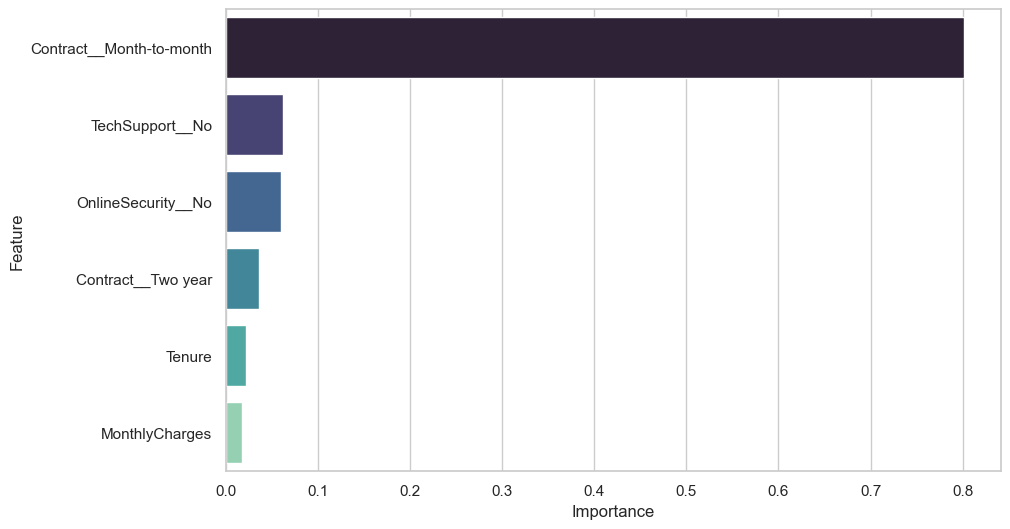

In [180]:
# visualization
plt.figure(figsize = (10,6))
sns.set_theme(style = 'whitegrid')
sns.barplot(data = feature_imp, x = 'Importance',y = 'Feature', orient = 'h', palette = 'mako')
plt.show()

Feature Importance: Each bar in the plot represents a feature used in the model.

Importance Value: The length of each bar (on the x-axis) indicates the relative importance of that feature in predicting churn. Features with longer bars are more influential in predicting or explaining why customers churn.

In [181]:
# explainer
import shap

explainer = shap.Explainer(
    model_final[-1].predict,
    model_final[0:-1].transform(X_test)
)
explainer = shap.TreeExplainer(model_final[-1])

shap_values = explainer(model_final[0:-1].transform(X_test))

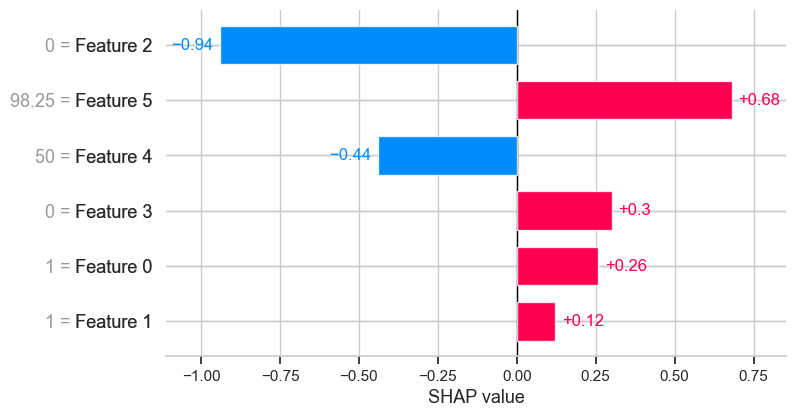

In [183]:
# shap_values for explaining observation in test data
i = 20

shap.plots.bar(shap_values[i])

In [184]:
[i for i in enumerate(list_features)]

[(0, 'OnlineSecurity__No'),
 (1, 'TechSupport__No'),
 (2, 'Contract__Month-to-month'),
 (3, 'Contract__Two year'),
 (4, 'Tenure'),
 (5, 'MonthlyCharges')]

The plot generated above will display bars representing each feature's contribution (SHAP value) to the model's prediction for the observation i (observation 20 in the above case). The length of each bar indicates the magnitude and direction of the impact each feature has on the model's prediction for the specific observation i. Positive SHAP values indicate features pushing the prediction higher (towards a 'churn' prediction), while negative values indicate features pushing the prediction lower (towards a 'not churn' prediction). For observation 20, not having a month-to-month contract contributed significantly towards a 'not churn' prediction, and having a 98.25 monthly charge contributed significantly towards a 'churn' prediction for the customer.

In [185]:
# shap_values for explaining all features in training set
X_train_trans = model_final[0:-1].transform(X_train)

# Explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data = X_train_trans,
    feature_perturbation = 'interventional',
    model_output='probability'
)

# shap values
shap_values = explainer.shap_values(X_train_trans)

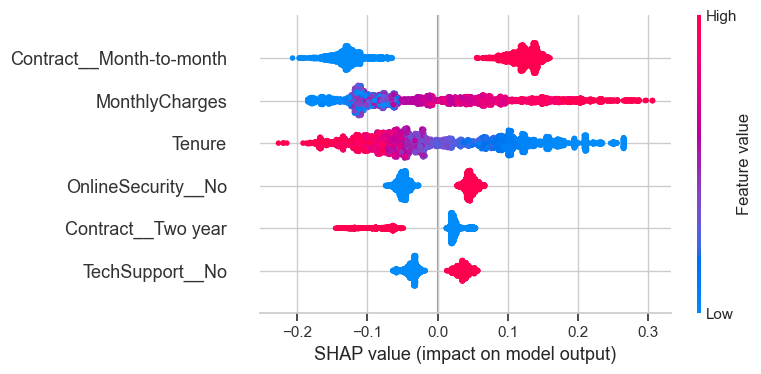

In [186]:
# summary plot for model in train
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names = list_features
)

The generated summary plot provides a comprehensive overview of feature importance and the impact of each feature on churn predictions in the following way:

* Each feature is represented by a horizontal bar.

* The length of the bar indicates the magnitude of the SHAP values. Longer bars indicate features that have a higher impact on model predictions.

* The color of the bar reflects the average value of the feature across the dataset. Features with higher values (towards red) or lower values (towards blue) are visually distinguished.

Now if we take a look at the "Contract__Month-to-month" feature, you will see that it has roughly the same amount of high and low values indicated with similar feature importance distributions on both sides. This means that higher values of the month-to-month contract feature contributes significantly towards a 'churn' prediction. In a similar manner, lower values of the month-to-month contract feature contributes significantly towards a 'not churn' prediction.

In a similar manner, if we take a look at the monthly charges feature, there are more higher values around higher shap values than there are lower ones. This means that higher monthly charges contribute positively towards a 'churn' prediction, whereas lower monthly charges contribute towards 'not churn' predictions, with less feature importance compared to the contribution of higher monthly charges values towards 'churn' predictions.

In [187]:
# shap js

def shap_plot(idx, model, dataset):
    explainerModel = shap.TreeExplainer(model)
    shap_values_model = explainerModel.shap_values(dataset)
    p = shap.force_plot(explainerModel.expected_value, shap_values_model[idx], dataset.iloc[[idx]])
    return (p)

A function for generating a SHAP force plot is defined above. The input model for the function is expected to be a tree-based model, like our chosen XGBoost model. 

In [189]:
X_test_preprocessed = pd.DataFrame(model_final[0:-1].transform(X_test))
X_test_preprocessed.columns = list_features
X_test_preprocessed

,OnlineSecurity__No,TechSupport__No,Contract__Month-to-month,Contract__Two year,Tenure,MonthlyCharges
0,1.0,1.0,1.0,0.0,15.0,83.20
1,1.0,1.0,1.0,0.0,18.0,78.55
2,1.0,1.0,0.0,1.0,72.0,97.85
3,1.0,1.0,1.0,0.0,18.0,45.65
4,0.0,0.0,0.0,1.0,72.0,112.60
...,...,...,...,...,...,...
966,0.0,0.0,0.0,0.0,24.0,24.60
967,1.0,1.0,0.0,0.0,51.0,98.85
968,0.0,0.0,0.0,1.0,54.0,45.20
969,0.0,0.0,1.0,0.0,1.0,19.85


In [190]:
shap.initjs()

In [191]:
# let's compare the real result
i = 50

print(f"The prediction for this customer is : {('Churn' if y_test.iloc[i] == 1 else 'Not Churn')} --> from y_test")

shap_plot(
    i,
    model_final['model'],
    X_test_preprocessed
)

The prediction for this customer is : Churn --> from y_test


The force plot above decomposes the prediction for a single instance into contributions from each feature. For observation 50 above, having a 1 month tenure, a month-to-month contract, online security, tech support, and not having a two year contract contributed significantly and by order of importance towards a 'churn' prediction. Whereas, having a monthly charge of 70.9 contributed negatively towards the 'churn' prediction.

In [192]:
# LIME
import lime
from lime import lime_tabular

In [193]:
# explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data = model_final[0:-1].transform(X_train),
    feature_names = list_features,
    class_names = ['Not Churn', 'Churn'],
    mode = 'classification'
)

explainer

The prediction of this customer is : Not Churn --> from y_test


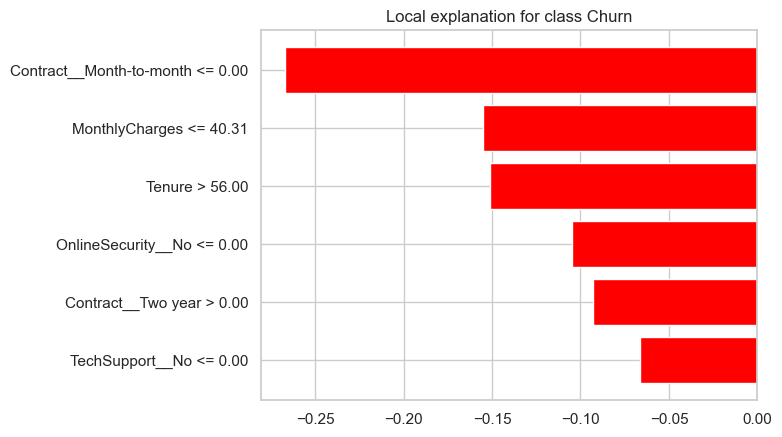

In [194]:
# lime observation using pylot figure
i = 10

print(f"The prediction of this customer is : {('Churn' if y_test.iloc[i] == 1 else 'Not Churn')} --> from y_test")

exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_final['model'].predict_proba,
    num_features=12
)

exp.as_pyplot_figure()
plt.show()

for observation 15 above, all features contributed negatively and towards a 'not churn' prediction.

In [195]:
# lime observation

print(f"The prediction of this customer is : {('Churn' if y_test.iloc[i] == 1 else 'Not Churn')} --> from y_test")

exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_final['model'].predict_proba
)

exp.show_in_notebook(show_table = True)

The prediction of this customer is : Not Churn --> from y_test


The plot above visualizes the decomposition each feature importance for the previous observation further and in greater detail.

# **Finalizing Model**

In [196]:
xgb_tuning.fit(X,y)
filename = 'best_capstone_model_xgb.sav'
pickle.dump(xgb_tuning,open(filename,'wb'))